In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
class LogisticRegression:
    
    __theta=[];
    
    def __init__(self):
        pass
    
    def __normalize(self, x):
        _min=np.min(x,axis=0)
        _max=np.max(x,axis=0)
        rng=_max-_min
        return (1-((_max-x)/rng))
    
    def __h(self, X, theta):
        return 1/(1+np.exp(-(X@theta)))
    
    def __gradient(self, X, theta):
        t=self.__h(X,theta)-y
        t=np.dot(t.T,X)
        return t
    
    def cost(self, X, y, theta):
        h=self.__h(X,theta)
        t1=y*np.log(h)
        t2=(1-y)*np.log(1-h)
        Cost=-t1-t2
        return np.mean(Cost)
    
    def train(self, x, y, lr=0.01, converge_change=0.00001, stacked=False):
        x=self.__normalize(x)
        
        self.__x=x
        self.__y=np.squeeze(y)
        
        if not stacked:
            X=np.column_stack(( np.ones(( y.shape[0],1 )), x ))
        else:
            X=x
        
        theta=np.zeros((X.shape[1],1))
        change, old_cost=1, self.cost(X,y,theta)
        iters=0
        self.__cost=[old_cost]
        
        while change>converge_change:
            theta=theta-lr*self.__gradient(X,theta).T
            new_cost=self.cost(X,y,theta)
            self.__cost.append(new_cost)
            change=abs(new_cost-old_cost)
            old_cost=new_cost
            iters+=1
        
        self.__theta=theta
        return theta, iters
    
    def plot_cost(self):
        plt.rcParams.update({'font.size': 15})
        plt.rcParams.update({'figure.figsize': (10,5)})
        
        plt.plot(self.__cost)
        plt.xlabel('#iterations')
        plt.ylabel('cost')
        plt.show()
        pass
    
    def plot_data(self):
        plt.rcParams.update({'font.size': 15})
        plt.rcParams.update({'figure.figsize': (10,5)})
        
        x_0=self.__x[np.where(self.__y == 0)]
        x_1=self.__x[np.where(self.__y == 1)]
        plt.scatter(x_0[:,0],x_0[:,1],c='b',label="y=0.0")
        plt.scatter(x_1[:,0],x_1[:,1],c='r',label='y=1.0')
        
        x1=np.arange(0.0,1.0,0.1)
        x2=-(self.__theta[0] + self.__theta[1]*x1)/self.__theta[2]
        plt.plot(x1,x2,label='decision boundary')
        
        plt.xlabel('Exam 1 Score: x1')
        plt.ylabel('Exam 2 Score: x2')
        plt.legend()
        plt.show()
    
    def predict(self, x, stacked=False):
        x=self.__normalize(x)
        if not stacked:
            X=np.column_stack(( np.ones(( y.shape[0],1 )), x ))
        else:
            X=x
        prob=np.squeeze(self.__h(X, self.__theta))
        self.pred_y=np.squeeze(np.where(prob>=0.5,1,0))
        return self.pred_y
    
    def accuracy(self):
        return np.sum(self.__y == self.pred_y)

In [3]:
data=pd.read_csv('data1.csv')
x=np.column_stack(( data['Exam 1 Score'], data['Exam 2 Score'] ))
y=np.array(data['y'],dtype=float).reshape(x.shape[0],1)

In [4]:
model=LogisticRegression()
theta, iters=model.train(x, y)

print('Predicted theta=',theta.T)
print('Number of Iterations=',iters)

print('Predicted values:')
print(model.predict(x))
print('Accuracy of model=',model.accuracy(),'%')

Predicted theta= [[-9.3671578  10.63702771 10.04113477]]
Number of Iterations= 1544
Predicted values:
[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
Accuracy of model= 89 %


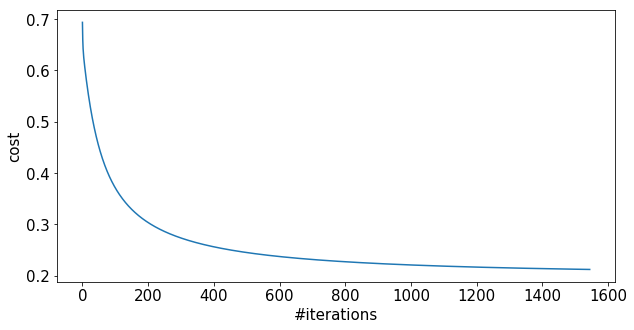

In [5]:
model.plot_cost()

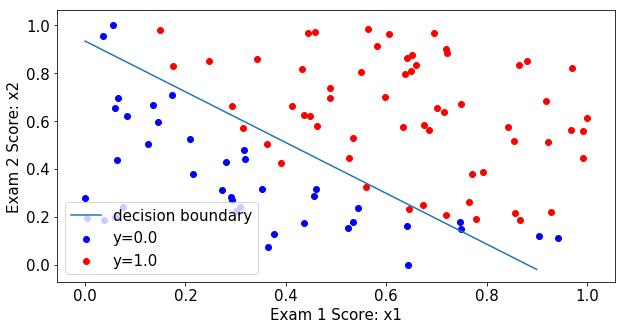

In [6]:
model.plot_data()